In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("C:/Users/DELL/OneDrive/Documents/dataset.csv",index_col="timestamp", parse_dates= True)
print(df.head())

                     Unnamed: 0  value
timestamp                             
2014-07-01 00:00:00           0  10844
2014-07-01 00:30:00           1   8127
2014-07-01 01:00:00           2   6210
2014-07-01 01:30:00           3   4656
2014-07-01 02:00:00           4   3820


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10320 entries, 2014-07-01 00:00:00 to 2015-01-31 23:30:00
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  10320 non-null  int64
 1   value       10320 non-null  int64
dtypes: int64(2)
memory usage: 241.9 KB


In [4]:
df.describe()

,Unnamed: 0,value
count,10320.000000,10320.000000
mean,5159.500000,15137.569380
std,2979.271723,6939.495808
min,0.000000,8.000000
25%,2579.750000,10262.000000
50%,5159.500000,16778.000000
75%,7739.250000,19838.750000
max,10319.000000,39197.000000


In [5]:
rows,columns=df.shape[0],df.shape[1]
print(rows)
print(columns)

10320
2


In [6]:
no_of_nan_values=df.isna().sum().sum()
no_of_nan_values

0

<AxesSubplot:xlabel='timestamp', ylabel='value'>

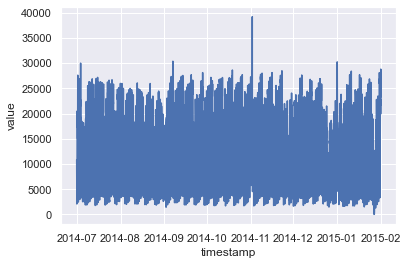

In [7]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=df,x="timestamp", y= df["value"])

In [8]:
start_date=pd.to_datetime('2014-11-01 00:00:00')
new_df=df[start_date:'2014-11-30 00:00:00']
new_df

,Unnamed: 0,value
timestamp,,
2014-11-01 00:00:00,5904,25425
2014-11-01 00:30:00,5905,24937
2014-11-01 01:00:00,5906,24946
2014-11-01 01:30:00,5907,23736
2014-11-01 02:00:00,5908,23245
...,...,...
2014-11-29 22:00:00,7292,20686
2014-11-29 22:30:00,7293,21659
2014-11-29 23:00:00,7294,21154


<AxesSubplot:xlabel='timestamp', ylabel='value'>

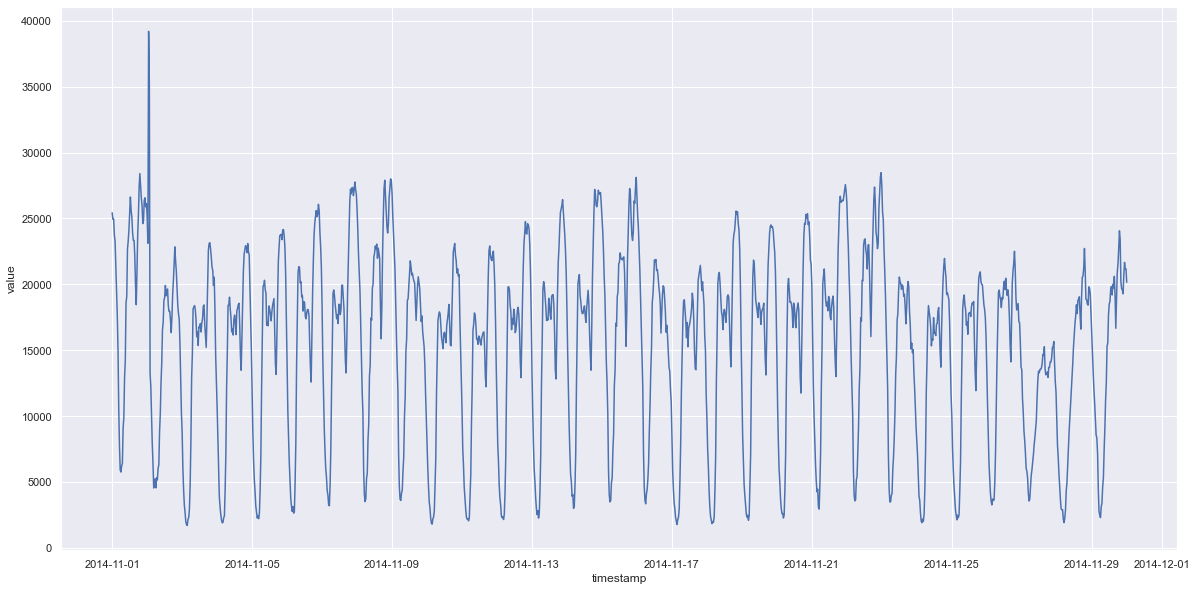

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(data=new_df,x="timestamp", y= df["value"])

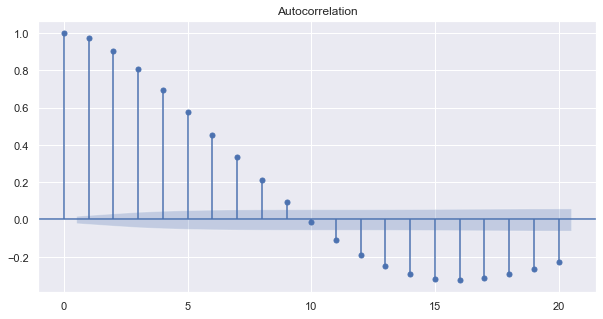

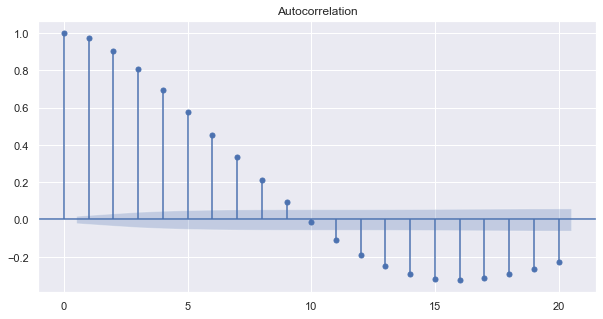

In [10]:
sns.set(rc={'figure.figsize':(10,5)})
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['value'], lags=20)

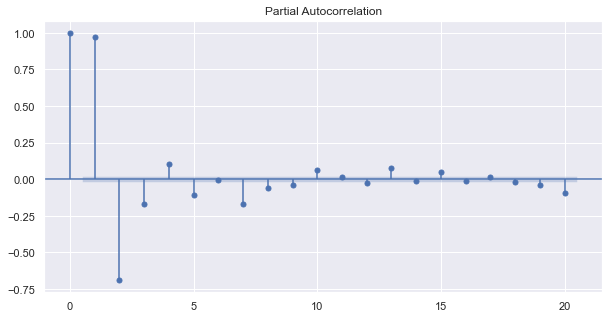

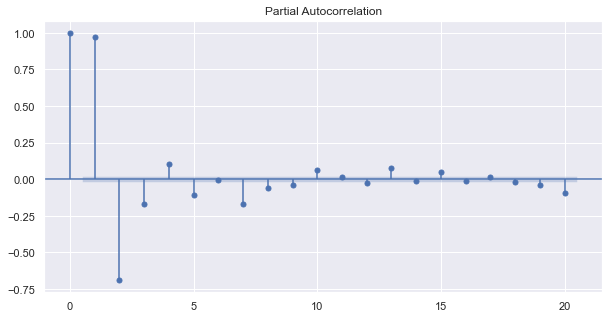

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['value'], lags = 20)

In [12]:
result=seasonal_decompose(df['value'], model='multiplicable', period = 1)

<AxesSubplot:xlabel='timestamp'>

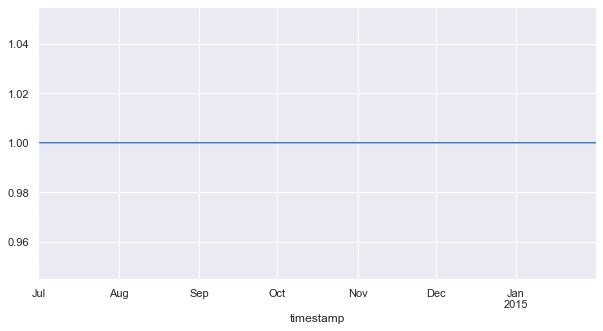

In [13]:
result.seasonal.plot()

<AxesSubplot:xlabel='timestamp'>

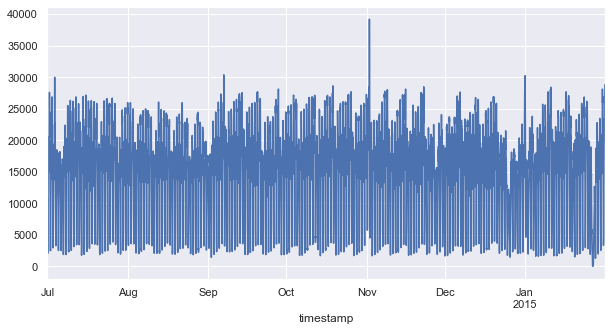

In [14]:
result.trend.plot()

<AxesSubplot:xlabel='timestamp'>

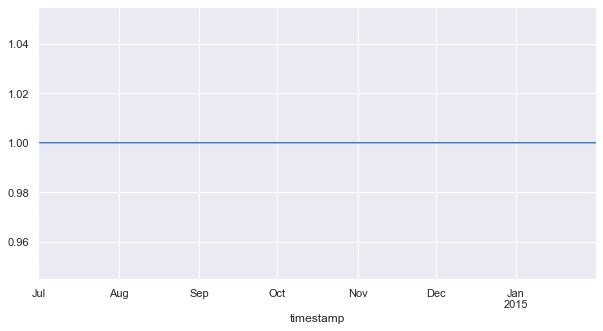

In [15]:
result.resid.plot()

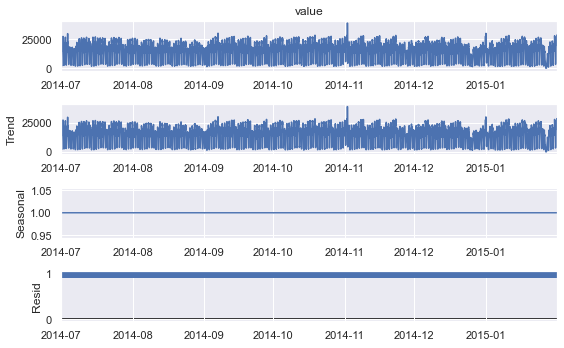

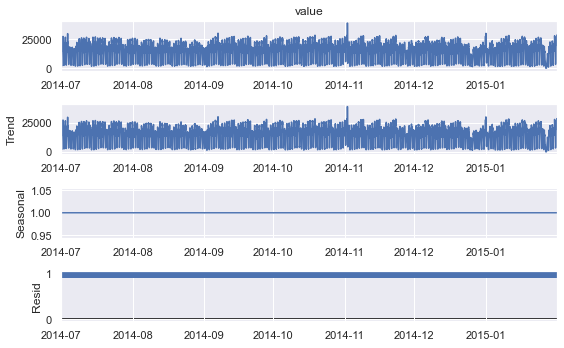

In [16]:
sns.set(rc={'figure.figsize':(8,5)})
result.plot()

In [17]:
day_to_observe=pd.to_datetime('2015-01-08')
next_day=day_to_observe+pd.offsets.Day(1)
next_day

Timestamp('2015-01-09 00:00:00')

In [98]:
one_day_df=df[day_to_observe:next_day-pd.Timedelta("30min")]
one_day_df

,Unnamed: 0,value
timestamp,,
2015-01-08 00:00:00,9168,9843
2015-01-08 00:30:00,9169,7477
2015-01-08 01:00:00,9170,5697
2015-01-08 01:30:00,9171,4327
2015-01-08 02:00:00,9172,3405
2015-01-08 02:30:00,9173,2739
2015-01-08 03:00:00,9174,2066
2015-01-08 03:30:00,9175,2013
2015-01-08 04:00:00,9176,1975


<AxesSubplot:xlabel='timestamp', ylabel='value'>

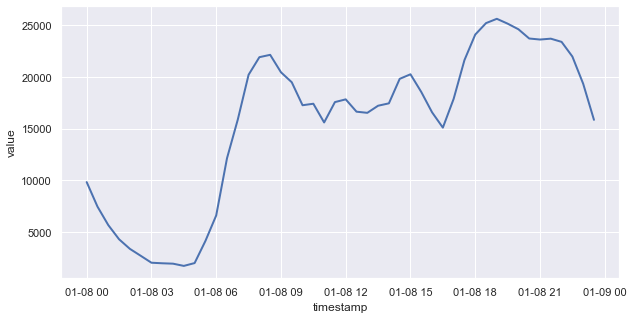

In [99]:
sns.lineplot(data=one_day_df,x=one_day_df.index,y='value',lw=2)


In [100]:
df['first_diff']=df['value'].diff(periods=1)
df.head(10)

,Unnamed: 0,value,first_diff
timestamp,,,
2014-07-01 00:00:00,0,10844,NaN
2014-07-01 00:30:00,1,8127,-2717.0
2014-07-01 01:00:00,2,6210,-1917.0
2014-07-01 01:30:00,3,4656,-1554.0
2014-07-01 02:00:00,4,3820,-836.0
2014-07-01 02:30:00,5,2873,-947.0
2014-07-01 03:00:00,6,2369,-504.0
2014-07-01 03:30:00,7,2064,-305.0
2014-07-01 04:00:00,8,2221,157.0


In [101]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df['first_diff'].dropna(),autolag="AIC")
output_df = pd.DataFrame({"Values":[adft[0],adft[1],adft[2],adft[3], adft[4]['1%'], adft[4]['5%'], adft[4]['10%']] ,
                          "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                    "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0    -38.324435              Test Statistics
1      0.000000                      p-value
2     39.000000             No. of lags used
3  10279.000000  Number of observations used
4     -3.430986          critical value (1%)
5     -2.861821          critical value (5%)
6     -2.566920         critical value (10%)


#### We can see that our data is stationary from the fact that our p-value is less than 5 percent and the test statistic is less than critical value

In [102]:
import statsmodels.api as sm
sm.tsa.stattools.kpss(df.first_diff.dropna(), regression='ct')


(0.0033906159475307614,
 0.1,
 39,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

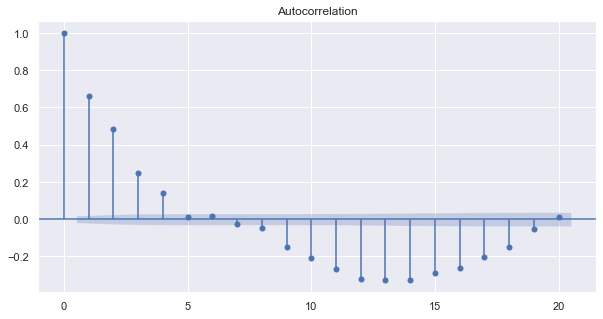

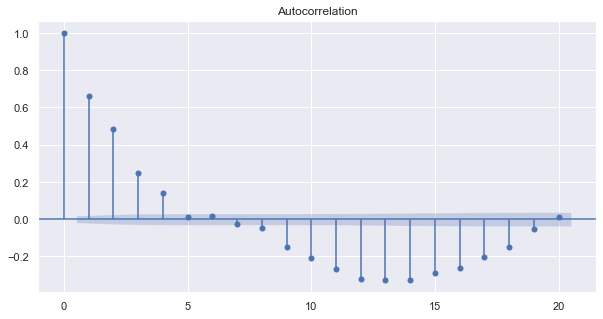

In [103]:
sns.set(rc={'figure.figsize':(10,5)})
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.first_diff.dropna(), lags=20)

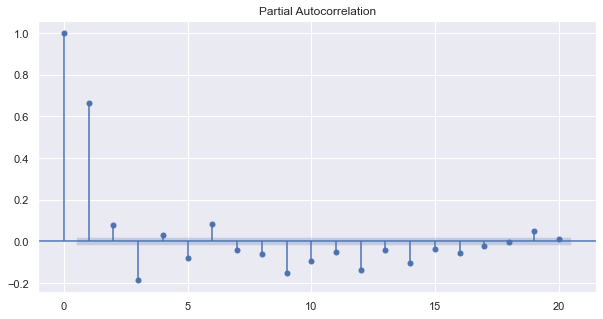

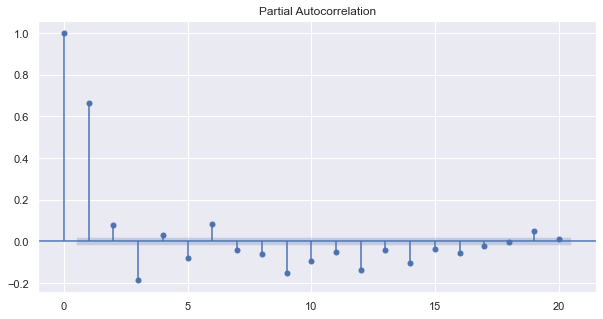

In [104]:
sns.set(rc={'figure.figsize':(10,5)})
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df.first_diff.dropna(), lags=20)

In [105]:
train_end= pd.to_datetime('2015-01-20') -pd.Timedelta("30min")
train_end

Timestamp('2015-01-19 23:30:00')

In [148]:
train_data=df.value[:train_end].dropna()
test_data=df.value[train_end+pd.Timedelta("30min"):].dropna()
test_data.head()

timestamp
2015-01-20 00:00:00    6941
2015-01-20 00:30:00    5164
2015-01-20 01:00:00    3940
2015-01-20 01:30:00    3073
2015-01-20 02:00:00    2690
Name: value, dtype: int64

In [150]:
len(train_data),len(test_data)


(9744, 576)

In [151]:
from statsmodels.tsa.arima_model import ARIMA

In [152]:
k = train_data

In [153]:
arima_value = ARIMA(k, order=(2,1,2))
model1 = arima_value.fit()
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 9743
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -83186.669
Method:                       css-mle   S.D. of innovations           1235.363
Date:                Tue, 14 Feb 2023   AIC                         166385.338
Time:                        16:23:13   BIC                         166428.443
Sample:                    07-01-2014   HQIC                        166399.948
                         - 01-19-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2725     38.115     -0.007      0.994     -74.976      74.431
ar.L1.D.value    -0.1544      0.020     -7.759      0.000      -0.193      -0.115
ar.L2.D.value     0.5274      0.016     

In [154]:
arima_value = ARIMA(k, order=(2,1,3))
model2 = arima_value.fit()
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 9743
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -83186.669
Method:                       css-mle   S.D. of innovations           1235.363
Date:                Tue, 14 Feb 2023   AIC                         166385.338
Time:                        16:23:25   BIC                         166428.443
Sample:                    07-01-2014   HQIC                        166399.948
                         - 01-19-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2725     38.115     -0.007      0.994     -74.976      74.431
ar.L1.D.value    -0.1544      0.020     -7.759      0.000      -0.193      -0.115
ar.L2.D.value     0.5274      0.016     

In [155]:
arima_value = ARIMA(k, order=(2,1,4))
model3 = arima_value.fit()
print(model1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 9743
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -83186.669
Method:                       css-mle   S.D. of innovations           1235.363
Date:                Tue, 14 Feb 2023   AIC                         166385.338
Time:                        16:23:37   BIC                         166428.443
Sample:                    07-01-2014   HQIC                        166399.948
                         - 01-19-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2725     38.115     -0.007      0.994     -74.976      74.431
ar.L1.D.value    -0.1544      0.020     -7.759      0.000      -0.193      -0.115
ar.L2.D.value     0.5274      0.016     

In [156]:
#residual = model3.resid

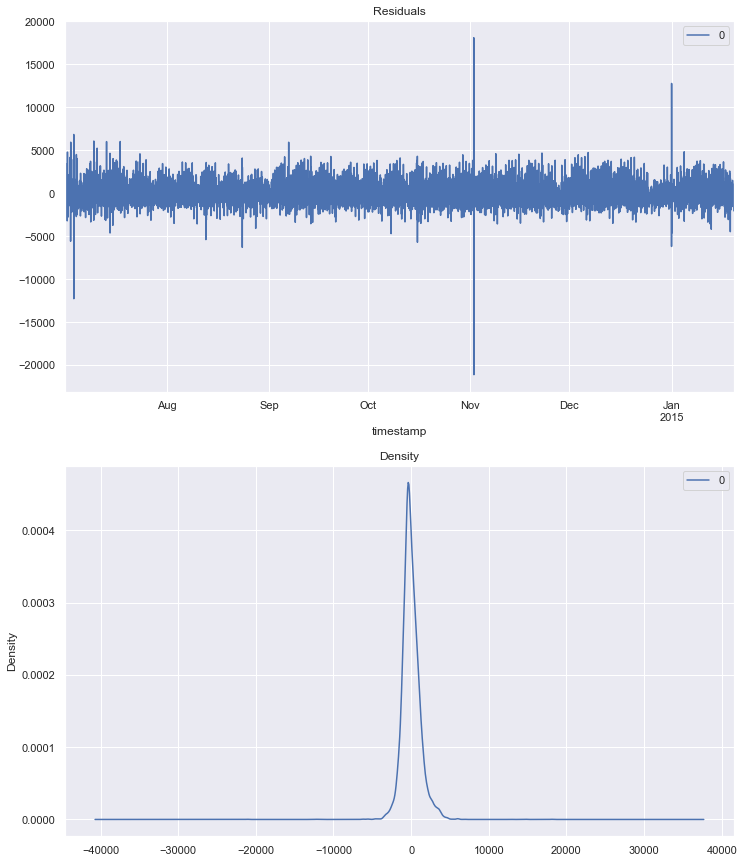

In [157]:
residuals = pd.DataFrame(model3.resid)
fig, ax = plt.subplots(2,1, figsize = [12,15])
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [163]:
am = ARIMA(train_data, order=(2,1,4)) 
t = am.fit()
print(t.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                 9743
Model:                 ARIMA(2, 1, 4)   Log Likelihood              -82782.893
Method:                       css-mle   S.D. of innovations           1184.954
Date:                Tue, 14 Feb 2023   AIC                         165581.787
Time:                        16:25:29   BIC                         165639.261
Sample:                    07-01-2014   HQIC                        165601.267
                         - 01-19-2015                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0096      0.257      0.037      0.970      -0.494       0.513
ar.L1.D.value     1.8530      0.008    220.743      0.000       1.837       1.869
ar.L2.D.value    -0.8867      0.008   -1

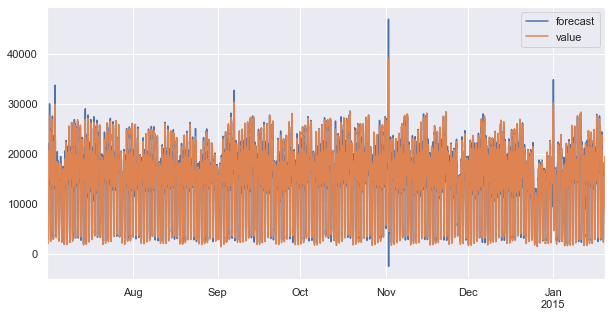

In [164]:
t.plot_predict(dynamic=False)
plt.show()

In [166]:
fc, se, cf = t.forecast(len(test_data), alpha = 0.05)
fc_series = pd.Series(fc)

In [171]:
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = test_data
predictions = fc_series
mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 7701.122028


In [ ]:
#forecasting for 20 units

In [173]:
am1 = ARIMA(df.value, order=(2,1,4)) 
t1 = am.fit()


In [175]:
fc, se, cf = t1.forecast(20, alpha = 0.05)
fc

array([ 6848.61432668,  6377.58191463,  6412.90483511,  6724.35826228,
        7270.17190773,  8005.42095491,  8883.89547201,  9859.80125232,
       10889.25394018, 11931.53957975, 12950.12562876, 13913.41668583,
       14795.25842366, 15575.20129851, 16238.54238089, 16776.16904039,
       17184.23219789, 17463.67945356, 17619.67968121, 17660.97075246])